In [1]:
import numpy as np
import pandas as pd
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

# Data Preparation
- Create a dataframe containing the meta data
- Create a list of all combinations given in the specification
- Filter out the data using these combinations
- Assign classes to each record (happy or sad)
- Assign gender class to each record so that it can be leveraged during analysis

In [3]:
records = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        records.append([filename, os.path.join(dirname,filename)])

data = pd.DataFrame(records, columns=['filename','path'])
data['actor'] = data['path'].apply(lambda x: re.findall("\w+_\d+",x)[0])
data = data[data['actor']!="audio_speech_actors_01"]
data.reset_index(inplace=True,drop=True)
data['type'] = data['filename'].apply(lambda x: re.split("-\d+\.wav",x)[0])
data

,filename,path,actor,type
0,03-01-08-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-08-01-01-01
1,03-01-01-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-01-01-01-01
2,03-01-07-02-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-07-02-01-02
3,03-01-07-01-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-07-01-01-02
4,03-01-01-01-02-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-01-01-02-01
...,...,...,...,...
1435,03-01-06-01-01-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-06-01-01-02
1436,03-01-05-01-02-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-05-01-02-02
1437,03-01-04-02-01-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-02-01-01
1438,03-01-07-02-02-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-07-02-02-02


## Number of Unique Speakers/Actors

In [4]:
data['actor'].nunique()

24

## Number of Audio files for each of the Speakers/Actors

In [5]:
data['actor'].value_counts()

Actor_02    60
Actor_17    60
Actor_18    60
Actor_13    60
Actor_03    60
Actor_14    60
Actor_09    60
Actor_10    60
Actor_19    60
Actor_04    60
Actor_22    60
Actor_24    60
Actor_23    60
Actor_12    60
Actor_06    60
Actor_15    60
Actor_08    60
Actor_20    60
Actor_11    60
Actor_01    60
Actor_21    60
Actor_16    60
Actor_05    60
Actor_07    60
Name: actor, dtype: int64

In [6]:
filter_list = []
for a in ["03","04"]:
    for b in ["01","02"]:
        for c in ["01","02"]:
            for d in ["01","02"]:
                filter_list.append(f"03-01-{a}-{b}-{c}-{d}")
                
data = data[data['type'].isin(filter_list)]
data.reset_index(inplace=True,drop=True)
data['class'] = data['type'].apply(lambda x: 'happy' if x.startswith('03-01-03') else 'sad')
data['gender'] = data['actor'].apply(lambda x: 'female' if int(x.split('_')[1])%2==0 else 'male')

In [7]:
data

,filename,path,actor,type,class,gender
0,03-01-04-01-02-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-04-01-02-01,sad,female
1,03-01-03-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-01-01-01,happy,female
2,03-01-03-01-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-01-01-02,happy,female
3,03-01-04-02-02-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-04-02-02-02,sad,female
4,03-01-03-02-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-02-01-02,happy,female
...,...,...,...,...,...,...
379,03-01-04-02-02-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-02-02-01,sad,male
380,03-01-04-01-01-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-01-01-01,sad,male
381,03-01-03-01-01-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-03-01-01-02,happy,male
382,03-01-03-01-02-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-03-01-02-01,happy,male


## Number of Audio Files for Gender and Emotion Class

In [8]:
data['gender'].value_counts()

female    192
male      192
Name: gender, dtype: int64

In [9]:
data['class'].value_counts()

sad      192
happy    192
Name: class, dtype: int64

In [10]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
def feature_extraction(df, mfcc=True):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        x , sr = librosa.load(record['path'])
        mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
        mean_ms = np.mean(librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128),axis=1)
        features.append(mean_mfcc if mfcc else mean_ms)
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['class']
    return dataf

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

## MFCC Features

In [13]:
dataf = feature_extraction(data)
dataf

100%|██████████| 384/384 [01:49<00:00,  3.50it/s]


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-655.887451,44.384995,-5.922089,5.301328,-5.846109,-3.695551,-10.138599,-10.529056,-5.311739,-2.087161,...,0.516419,0.085295,0.505571,0.453406,0.520696,0.698611,0.274180,0.390192,0.463052,sad
1,-585.728638,44.487385,-22.599588,9.817187,-8.152647,-4.897212,-5.878748,-11.672596,-5.678559,-2.191390,...,0.119705,-0.098642,-0.040381,-0.069480,0.143877,0.309188,0.215849,0.184923,-0.039408,happy
2,-605.731567,46.535400,-19.348291,13.490911,-7.866285,-5.181213,-5.951238,-11.170672,-4.939478,-2.804853,...,0.041053,-0.128919,-0.220368,-0.167521,0.132135,-0.016883,-0.127417,0.468943,0.076724,happy
3,-661.506409,45.826687,-8.344815,6.547118,-6.763440,-5.770291,-13.880534,-12.418793,-10.221001,-1.434967,...,0.394012,-0.028128,-0.411090,0.139783,-0.099380,-0.056837,-0.021696,-0.091667,-0.078984,sad
4,-484.870270,37.232101,-32.120388,7.449311,-10.889061,-14.209931,-9.655681,-12.668373,-6.404204,-4.595531,...,0.083605,-0.307447,-0.368100,0.128967,0.459337,-0.001367,0.038329,0.208846,0.140713,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-568.361694,57.210964,0.689538,12.319594,6.551199,-0.579483,-16.130163,-6.567527,-11.981589,-4.644282,...,0.360626,0.436093,0.418931,0.527836,-0.141552,0.049041,0.278503,0.119281,0.330996,sad
380,-723.345276,73.582787,0.339823,12.872882,5.823831,-0.428393,-6.189918,-9.161605,-7.757164,-0.468081,...,-0.157852,0.274586,0.435817,0.400723,0.269498,0.262169,-0.085667,0.086252,0.102733,sad
381,-637.680298,78.848213,-7.289741,16.754478,6.813106,-4.355325,-9.541617,-7.217409,-0.118985,0.594490,...,0.124824,0.241637,0.051282,0.336582,0.019449,0.083065,0.025247,-0.009976,-0.082464,happy
382,-614.372986,73.964455,-10.224572,16.619707,6.027779,-0.498516,-12.134979,-9.038947,-1.969959,2.583837,...,0.138655,-0.109003,-0.038419,0.154577,-0.452695,0.194174,-0.015858,-0.433527,0.668562,happy


In [16]:
X1 = dataf.iloc[:,:-1].values
y1 = dataf.iloc[:,-1].values 
y1 = encoder.fit_transform(y1)

## Mel Spectrogram Features

In [17]:
dataf = feature_extraction(data,mfcc=False)
dataf

100%|██████████| 384/384 [01:42<00:00,  3.73it/s]


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,0.000006,0.000004,0.000007,0.000004,0.000004,0.000113,0.010259,0.098932,0.067486,0.040678,...,0.000055,0.000103,0.000051,0.000088,0.000059,0.000027,0.000010,5.699148e-07,1.328700e-08,sad
1,0.000010,0.000062,0.000121,0.000124,0.000140,0.002472,0.019177,0.073552,0.093589,0.154644,...,0.000048,0.000044,0.000041,0.000036,0.000020,0.000020,0.000008,5.696949e-07,1.192879e-08,happy
2,0.000015,0.000039,0.000191,0.000211,0.000450,0.001405,0.015066,0.073748,0.153525,0.073451,...,0.000050,0.000072,0.000047,0.000052,0.000026,0.000022,0.000005,4.933852e-07,6.702309e-09,happy
3,0.000001,0.000003,0.000018,0.000027,0.000068,0.000192,0.000435,0.001680,0.007180,0.101979,...,0.000110,0.000083,0.000171,0.000140,0.000173,0.000078,0.000018,6.620908e-07,7.958770e-09,sad
4,0.000100,0.000096,0.000092,0.000068,0.000046,0.000340,0.015523,0.228503,0.263276,0.121614,...,0.000364,0.000303,0.000181,0.000219,0.000268,0.000211,0.000069,1.035259e-05,1.570711e-07,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.584062,0.000854,0.000105,0.000018,0.000614,0.020639,0.083743,0.061423,0.052704,0.012844,...,0.000343,0.000377,0.000544,0.000408,0.000355,0.000266,0.000091,7.500726e-06,7.699102e-08,sad
380,0.000039,0.000011,0.000006,0.000412,0.007097,0.017221,0.015674,0.000889,0.000942,0.005823,...,0.000002,0.000002,0.000004,0.000006,0.000007,0.000007,0.000002,1.133628e-07,1.654082e-09,sad
381,0.000367,0.000086,0.002112,0.002465,0.024505,0.084531,0.065262,0.003117,0.001634,0.011607,...,0.000003,0.000007,0.000013,0.000012,0.000009,0.000005,0.000001,1.083808e-07,1.771896e-09,happy
382,0.000077,0.000044,0.000832,0.001446,0.004995,0.040185,0.114150,0.042320,0.021464,0.004327,...,0.000027,0.000035,0.000060,0.000048,0.000041,0.000023,0.000006,5.396258e-07,8.839143e-09,happy


In [18]:
X2 = dataf.iloc[:,:-1].values
y2 = dataf.iloc[:,-1].values
y2 = encoder.fit_transform(y2)

# Modelling
- The following models will be used for building the models for emotion detection
1. Logistic Regression on MFCC and Mel Spec Features
2. CNNs on MFCC and Mel Spec Features
3. Autoencoders and Variational Autoencoders on whichever features are giving better performance in the above models

## Logistic Regression

<img src='https://miro.medium.com/max/1400/1*Ba7LqnrsRnhjJyJl5LPW6Q.gif'>

In [19]:
def LogisticRegressionPipeline(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipeline = Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])
    pipeline.fit(X_train,y_train)
    y_train_pred = pipeline.predict(X_train)
    y_pred = pipeline.predict(X_test)
    
    cmatrix = confusion_matrix(y_test,y_pred)
    
    print("Training Performance")
    print(classification_report(y_train,y_train_pred))
    print("-----------------------------------------")
    print("Test Performance")
    print(classification_report(y_test,y_pred))
    print("-----------------------------------------")
    
    cv_score = cross_val_score(pipeline,X,y,cv=5)
    average = lambda x: sum(x)/len(x)
    print("5-Folds Scores: ", cv_score)
    print("-----------------------------------------")
    print("5-Folds Average Score: ",average(cv_score))
    
    return cv_score, cmatrix

## Logistic Regression: MFCCs

In [20]:
scores, cmatrix = LogisticRegressionPipeline(X1,y1)

Training Performance
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.97      0.99      0.98       153

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307

-----------------------------------------
Test Performance
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        38
           1       0.76      0.82      0.79        39

    accuracy                           0.78        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.78      0.78      0.78        77

-----------------------------------------
5-Folds Scores:  [0.64935065 0.74025974 0.67532468 0.68831169 0.80263158]
-----------------------------------------
5-Folds Average Score:  0.7111756664388242


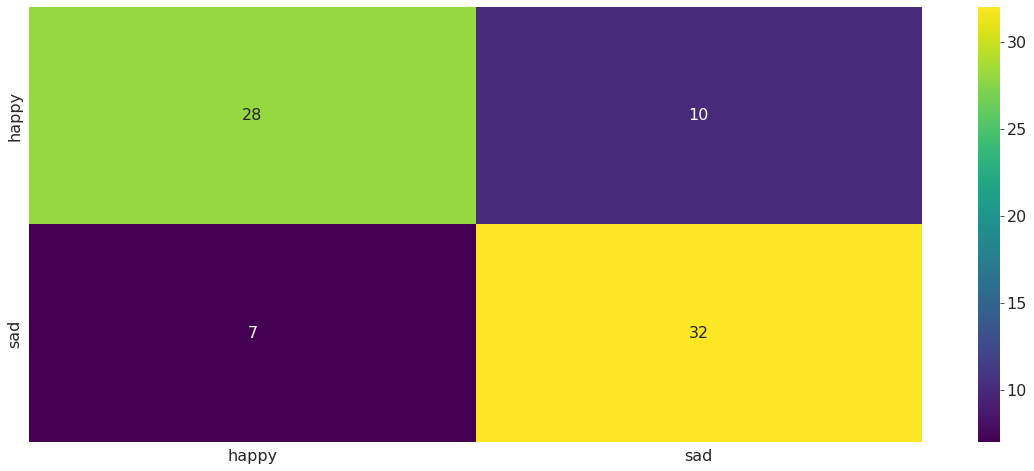

In [21]:
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

## Logistic Regression: Mel Spectrogram

In [22]:
scores, cmatrix = LogisticRegressionPipeline(X2,y2)

Training Performance
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       153
           1       0.73      0.93      0.82       154

    accuracy                           0.79       307
   macro avg       0.82      0.79      0.79       307
weighted avg       0.82      0.79      0.79       307

-----------------------------------------
Test Performance
              precision    recall  f1-score   support

           0       0.81      0.64      0.71        39
           1       0.70      0.84      0.76        38

    accuracy                           0.74        77
   macro avg       0.75      0.74      0.74        77
weighted avg       0.75      0.74      0.74        77

-----------------------------------------
5-Folds Scores:  [0.67532468 0.74025974 0.67532468 0.72727273 0.71052632]
-----------------------------------------
5-Folds Average Score:  0.7057416267942583


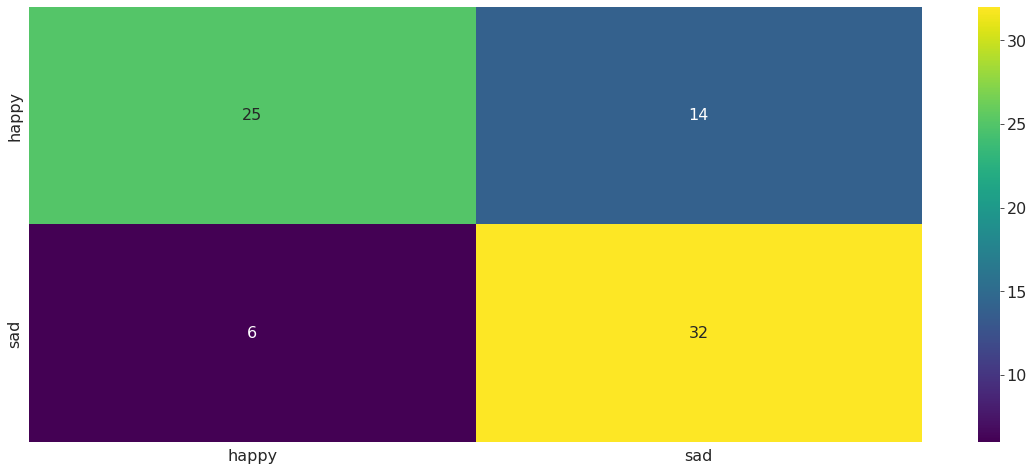

In [23]:
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

In [25]:
import joblib

def LogisticRegressionPipeline(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipeline = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', LogisticRegression())])
    pipeline.fit(X_train, y_train)  # Train the model

    # Model Performance Evaluation
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    print("Training Performance")
    print(classification_report(y_train, y_train_pred))
    print("-----------------------------------------")
    print("Test Performance")
    print(classification_report(y_test, y_test_pred))
    print("-----------------------------------------")
    
    # Save the trained model
    joblib.dump(pipeline, "emotion_model.pkl")
    print("Model saved successfully as 'emotion_model.pkl'")

    return pipeline  # Return the trained model

# Train and save the model
pipeline = LogisticRegressionPipeline(X1, y1)


Training Performance
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.99      0.98       154

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307

-----------------------------------------
Test Performance
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.81      0.79      0.80        38

    accuracy                           0.81        77
   macro avg       0.81      0.80      0.81        77
weighted avg       0.81      0.81      0.81        77

-----------------------------------------
Model saved successfully as 'emotion_model.pkl'


In [27]:
import random
import joblib
import librosa
import numpy as np
import IPython.display as ipd

# Load the trained model
pipeline = joblib.load("emotion_model.pkl")  # Ensure this matches your saved model filename

# Pick a random audio from the dataset
random_audio = random.choice(data['path'].tolist())  # Selecting a random audio path

# Function to predict emotion
def predict_emotion(audio_path, model):
    print(f"Processing: {audio_path}")
    
    # Load the audio file
    x, sr = librosa.load(audio_path)
    
    # Extract MFCC features
    features = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128), axis=1).reshape(1, -1)
    
    # Predict emotion
    prediction = model.predict(features)
    emotion = "Happy" if prediction[0] == 0 else "Sad"
    
    print(f"Predicted Emotion: {emotion}")
    
    # Play the audio
    ipd.display(ipd.Audio(audio_path, rate=sr))

    return emotion

# Run emotion detection on a random audio
predicted_emotion = predict_emotion(random_audio, pipeline)


Processing: /kaggle/input/ravdess-emotional-speech-audio/Actor_23/03-01-03-02-01-02-23.wav
Predicted Emotion: Happy


In [28]:
import joblib
import librosa
import numpy as np
import IPython.display as ipd

# Load the trained model
pipeline = joblib.load("emotion_model.pkl")  # Ensure this matches your saved model filename

# Let user select an audio file
audio_path = input(" /kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-02-01-02-01-21.wav")

# Function to predict emotion
def predict_emotion(audio_path, model):
    print(f"Processing: {audio_path}")
    
    # Load the audio file
    x, sr = librosa.load(audio_path)
    
    # Extract MFCC features
    features = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128), axis=1).reshape(1, -1)
    
    # Predict emotion
    prediction = model.predict(features)
    emotion = "Happy" if prediction[0] == 0 else "Sad"
    
    print(f"Predicted Emotion: {emotion}")
    
    # Play the audio
    ipd.display(ipd.Audio(audio_path, rate=sr))

    return emotion

# Run emotion detection on user-selected audio
predicted_emotion = predict_emotion(audio_path, pipeline)


 /kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-02-01-02-01-21.wav /kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-02-01-02-01-21.wav


Processing: /kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-02-01-02-01-21.wav
Predicted Emotion: Sad
